<a href="https://colab.research.google.com/github/KimGriezmann/DeepLearning_BeTheLegend/blob/master/%20using_def_for_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **모든 전처리 함수를 포함하여 한 시즌의 데이터셋을 만들어내는 과정입니다.**

1. 날짜 형식 변경
2. 더블헤더 처리
3. @유무에 따라 home/away 구분
4. 해당 경기의 안타 성공 결과(result) 도출
5. home/away 별 타율
6. 팀 상대 타율
7. 최근 5일 타율
8. 최근 5경기/10경기 타율
9. 최근 10일 안타 성공률
10. 최근 10경기 안타 성공률

In [1]:
import numpy as np
import pandas as pd
import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_2021 = pd.read_csv('/content/drive/MyDrive/bethelegend/data_2021.csv', encoding='euc-kr')
batter_data_2021 = pd.read_csv('/content/drive/MyDrive/bethelegend/batter_data_2021.csv', encoding='euc-kr')

### **날짜 형식 변경**

In [5]:
import pandas as pd
import numpy as numpy

# 날짜 데이터 값, 형식 변경
# 현재 : object 형식으로 "2018-04-04" 값으로 존재 (의미 : 4월 4일)
# 변경 : int 형식으로 20180404 으로 변경 (의미 : 2018년 4월 4일)

def day_to_int(data):
  data['day'] = pd.to_numeric(data['day'].str.replace("-",""))
  return data

In [6]:
data_2021 = day_to_int(data_2021)

### **더블헤더 처리**

In [8]:
def double_header(data):

  temp = np.zeros(len(data))

  # day, name이 같은 값이 있다는 것은 더블헤더 경기가 있다는것
  # keep=False 옵션은 중복 값에 해당하는 튜플들을 모두 True로 리턴, 그 외 옵션 : 'first', 'last' 의 경우 둘 중 하나만 True
  dup = data.loc[:,['day','name']].duplicated(keep=False) 

  for i in range(len(data)):
    if dup[i]==False:
      temp[i]=0
    elif dup[i]==True:
      temp[i]=1

  # 중복의 첫번째 행은 더블헤더 1차전
  # 중복인 두번째 행이 더블헤더 2차전이다.
  for i in range(1,len(temp)):
    if temp[i]==1 and temp[i-1]==1:
      temp[i]=2

  data['double']=temp

  return data

In [9]:
data_2021 = double_header(data_2021)

In [11]:
ex_data = data_2021.loc[:, ['name', 'day', 'double', 'vs', 'ab', 'hit']]

In [10]:
data_2021

,name,day,vs,result,bat_order,position,start_member,ab,score,hit,2_hit,3_hit,homerun,tb,rbi,sb,cs,bb,hpp,ibb,so,gdp,sh,sf,avg,obp,slg,ops,pitch,avLI,RE24,WPA,double
0,강백호,20210404,한화,W 3:2,4,1B,True,3,0,2,0,0,0,2,0,2,0,1,0,0,0,0,0,0,0.667,NaN,0.667,1.417,16,1.14,0.89,0.122,0.0
1,강백호,20210406,LG,L 2:3,4,1B,True,4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0.286,NaN,0.286,0.661,14,2.07,-1.00,-0.183,0.0
2,강백호,20210407,LG,W 7:3,4,1B,True,4,0,3,0,0,0,3,1,0,0,1,0,0,0,0,0,0,0.455,NaN,0.455,0.993,17,1.43,1.75,0.330,0.0
3,강백호,20210408,LG,L 3:7,4,1B,True,4,0,2,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0.467,NaN,0.467,0.996,17,0.89,-0.76,-0.102,0.0
4,강백호,20210409,@삼성,L 5:7,4,1B,True,5,0,3,0,1,0,5,3,0,0,0,0,0,1,1,0,0,0.500,NaN,0.600,1.145,21,0.94,1.88,-0.122,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,김민하,20210623,@삼성,L 0:3,7,LF,True,3,0,1,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0.219,NaN,0.313,0.671,7,1.10,-0.62,-0.066,0.0
5816,김민하,20210624,@삼성,L 2:3,6,RF,True,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.210,NaN,0.300,0.647,9,1.65,-1.56,-0.220,0.0
5817,김민하,20210626,KT,L 2:11,3,RF,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.208,NaN,0.297,0.641,7,0.01,-0.25,0.000,0.0
5818,김민하,20210709,@SSG,D :,5,CF,True,4,0,1,0,0,0,1,1,0,0,0,1,0,3,0,0,0,0.210,NaN,0.295,0.641,19,0.68,0.40,0.036,0.0


### **vs에서 @ 유무에 따라 home / away 구분하기**

In [12]:
def make_vs(data):
  data['vs_team'] = [s[1:] if s[0] == '@' else s for s in data['vs']] 

  result_Dataframe = pd.DataFrame()
  result_Dataframe['name'] = data['name']
  result_Dataframe['day'] = data['day']
  result_Dataframe['double'] = data['double']
  result_Dataframe['vs'] = data['vs']
  result_Dataframe['vs_team'] = data['vs_team']
  result_Dataframe['ab'] = data['ab']
  result_Dataframe['hit'] = data['hit']
  result_Dataframe

  return result_Dataframe

In [13]:
ex_data2 = make_vs(ex_data)

### **해당 경기의 안타 성공 결과(result) 도출**

In [14]:
def make_result(data):
  data['result'] = [0 if s == 0 else 1 for s in data['hit']] 

  result_Dataframe = pd.DataFrame()
  result_Dataframe['name'] = data['name']
  result_Dataframe['day'] = data['day']
  result_Dataframe['double'] = data['double']
  result_Dataframe['vs'] = data['vs']
  result_Dataframe['vs_team'] = data['vs_team']
  result_Dataframe['ab'] = data['ab']
  result_Dataframe['hit'] = data['hit']
  result_Dataframe['result'] = data['result']
  result_Dataframe

  return result_Dataframe

In [20]:
ex_data3 = make_result(ex_data2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


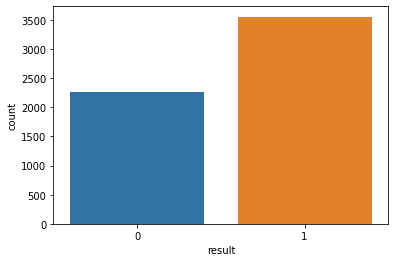

In [21]:
sns.countplot(ex_data3['result'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


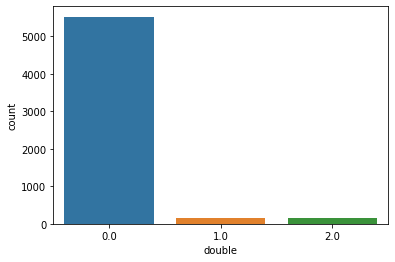

In [22]:
sns.countplot(ex_data3['double'])
plt.show()

### **home/away 구분하는 열 추가**

In [23]:
def make_home_away(data):
  data['home/away'] = ['away' if s[0] == '@' else 'home' for s in data['vs']]

  result_Dataframe = pd.DataFrame()
  result_Dataframe['name'] = data['name']
  result_Dataframe['day'] = data['day']
  result_Dataframe['double'] = data['double']
  result_Dataframe['vs'] = data['vs']
  result_Dataframe['vs_team'] = data['vs_team']
  result_Dataframe['ab'] = data['ab']
  result_Dataframe['hit'] = data['hit']
  result_Dataframe['result'] = data['result']
  result_Dataframe['home/away'] = data['home/away']
  result_Dataframe

  return result_Dataframe

In [24]:
ex_data4 = make_home_away(ex_data3)

### **home/away별 타율 구하는 과정**

In [25]:
def make_home_away_slot(data):
  data['home_ab'] = [0 if s == 'home' else 0 for s, ab in zip(data['home/away'], data['ab'])]
  data['home_hit'] = [0 if s == 'home' else 0 for s, hit in zip(data['home/away'], data['hit'])]
  data['away_ab'] = [0 if s == 'away' else 0 for s, ab in zip(data['home/away'], data['ab'])]
  data['away_hit'] = [0 if s == 'away' else 0 for s, hit in zip(data['home/away'], data['hit'])]

  result_Dataframe = pd.DataFrame()
  result_Dataframe['name'] = data['name']
  result_Dataframe['day'] = data['day']
  result_Dataframe['double'] = data['double']
  result_Dataframe['vs'] = data['vs']
  result_Dataframe['vs_team'] = data['vs_team']
  result_Dataframe['ab'] = data['ab']
  result_Dataframe['hit'] = data['hit']
  result_Dataframe['home/away'] = data['home/away']
  result_Dataframe['home_ab'] = data['home_ab']
  result_Dataframe['home_hit'] = data['home_hit']
  result_Dataframe['away_ab'] = data['away_ab']
  result_Dataframe['away_hit'] = data['away_hit']
  result_Dataframe

  return result_Dataframe  

In [26]:
ex_data5 = make_home_away_slot(ex_data4)

In [27]:
def make_home_away_ab_hit(data, batter):
  result_Dataframe = pd.DataFrame()
  for h in tqdm.tqdm(batter['name'].values): # 90명 타자 한명씩 접근
    hdata = data.loc[data['name']== h ]
    for i in range(0, len(hdata)-1):
      if hdata.iloc[i, 7] == 'home':
        hdata.iloc[i+1, 8] = hdata.iloc[i, 8] + hdata.iloc[i, 5]
        hdata.iloc[i+1, 10] = hdata.iloc[i, 10]
        hdata.iloc[i+1, 9] = hdata.iloc[i, 9] + hdata.iloc[i, 6]
        hdata.iloc[i+1, 11] = hdata.iloc[i, 11]
      else:
        hdata.iloc[i+1, 10] = hdata.iloc[i, 10] + hdata.iloc[i, 5]
        hdata.iloc[i+1, 8] = hdata.iloc[i, 8]
        hdata.iloc[i+1, 11] = hdata.iloc[i, 11] + hdata.iloc[i, 6]
        hdata.iloc[i+1, 9] = hdata.iloc[i, 9]
    result_Dataframe = pd.concat([result_Dataframe, hdata])

  return result_Dataframe


In [28]:
ex_data6 = make_home_away_ab_hit(ex_data5, batter_data_2021)

  0%|          | 0/90 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
100%|██████████| 90/90 [00:09<00:00,  9.35it/s]


In [29]:
def make_home_away_avg(data):
  data['home/away_avg'] = np.where(data['home/away'] == 'home', round(data['home_hit']/data['home_ab'],3), round(data['away_hit'] / data['away_ab'],3))

  result_Dataframe = pd.DataFrame()
  result_Dataframe['name'] = data['name']
  result_Dataframe['day'] = data['day']
  result_Dataframe['double'] = data['double']
  result_Dataframe['vs'] = data['vs']
  result_Dataframe['vs_team'] = data['vs_team']
  result_Dataframe['ab'] = data['ab']
  result_Dataframe['hit'] = data['hit']
  result_Dataframe['home/away'] = data['home/away']
  result_Dataframe['home_ab'] = data['home_ab']
  result_Dataframe['home_hit'] = data['home_hit']
  result_Dataframe['away_ab'] = data['away_ab']
  result_Dataframe['away_hit'] = data['away_hit']
  result_Dataframe['home/away_avg'] = data['home/away_avg']
  result_Dataframe['home/away_avg'].fillna(0, inplace = True)
  result_Dataframe

  return result_Dataframe  

In [30]:
hw_data = make_home_away_avg(ex_data6)
hw_data

,name,day,double,vs,vs_team,ab,hit,home/away,home_ab,home_hit,away_ab,away_hit,home/away_avg
0,강백호,20210404,0.0,한화,한화,3,2,home,0,0,0,0,0.000
1,강백호,20210406,0.0,LG,LG,4,0,home,3,2,0,0,0.667
2,강백호,20210407,0.0,LG,LG,4,3,home,7,2,0,0,0.286
3,강백호,20210408,0.0,LG,LG,4,2,home,11,5,0,0,0.455
4,강백호,20210409,0.0,@삼성,삼성,5,3,away,15,7,0,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,김민하,20210623,0.0,@삼성,삼성,3,1,away,47,15,46,5,0.109
5816,김민하,20210624,0.0,@삼성,삼성,4,0,away,47,15,49,6,0.122
5817,김민하,20210626,0.0,KT,KT,1,0,home,47,15,53,6,0.319
5818,김민하,20210709,0.0,@SSG,SSG,4,1,away,48,15,53,6,0.113


### **상대 팀별 타율 구하기**

In [31]:
sort_data = ex_data3.sort_values(by=["vs_team", "name"])

In [32]:
def make_vs_slot(data):
  data['vs_ab'] = [0 if s == 'home' else 0 for s in data['home/away']]
  data['vs_hit'] = [0 if s == 'home' else 0 for s in data['home/away']]

  result_Dataframe = pd.DataFrame()
  result_Dataframe['name'] = data['name']
  result_Dataframe['day'] = data['day']
  result_Dataframe['double'] = data['double']
  result_Dataframe['vs'] = data['vs']
  result_Dataframe['vs_team'] = data['vs_team']
  result_Dataframe['ab'] = data['ab']
  result_Dataframe['hit'] = data['hit']
  result_Dataframe['result'] = data['result']
  result_Dataframe['home/away'] = data['home/away']
  result_Dataframe['vs_ab'] = data['vs_ab']
  result_Dataframe['vs_hit'] = data['vs_hit']
  result_Dataframe

  return result_Dataframe  

In [33]:
vs_data = make_vs_slot(sort_data)

In [34]:
def make_vs_ab_hit(data):
  result_Dataframe = pd.DataFrame()
  team = np.array(('KIA', 'KT', 'LG', 'SSG', 'NC', '롯데', '두산', '삼성', '키움', '한화', 'SK'))

  for t in tqdm.tqdm(team):
    vdata = data.loc[data['vs_team']== t]  
    for i in range(0, len(vdata)-1):
      if vdata.iloc[i]['name'] == vdata.iloc[i+1]['name']:
        vdata.iloc[i+1, 9] = vdata.iloc[i, 9] + vdata.iloc[i, 5] #vs_ab
        vdata.iloc[i+1, 10] = vdata.iloc[i, 10] + vdata.iloc[i, 6] #vs_hit
      else:
        vdata.iloc[i+1, 9] = 0
        vdata.iloc[i+1, 10] = 0

    result_Dataframe = pd.concat([result_Dataframe, vdata])

  return result_Dataframe

In [ ]:
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 100)

In [35]:
vs_ab_hit_data = make_vs_ab_hit(vs_data)

  0%|          | 0/11 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
100%|██████████| 11/11 [00:06<00:00,  1.58it/s]


In [36]:
def make_vs_avg(data):
  for i in range(0, len(data)+1):
    try:
      data['vs_avg'] = round(data['vs_hit']/data['vs_ab'], 3)
    except ZeroDivisionError:
      data['vs_avg'] = 0

  result_Dataframe = pd.DataFrame()
  result_Dataframe['name'] = data['name']
  result_Dataframe['day'] = data['day']
  result_Dataframe['double'] = data['double']
  result_Dataframe['vs'] = data['vs']
  result_Dataframe['vs_team'] = data['vs_team']
  result_Dataframe['ab'] = data['ab']
  result_Dataframe['hit'] = data['hit']
  result_Dataframe['result'] = data['result']
  result_Dataframe['home/away'] = data['home/away']
  result_Dataframe['vs_ab'] = data['vs_ab']
  result_Dataframe['vs_hit'] = data['vs_hit']
  result_Dataframe['vs_avg'] = data['vs_avg']
  result_Dataframe['vs_avg'].fillna(0, inplace = True)
  result_Dataframe

  return result_Dataframe  

In [37]:
final_vs_avg_data = make_vs_avg(vs_ab_hit_data)
final_vs_avg_data

,name,day,double,vs,vs_team,ab,hit,result,home/away,vs_ab,vs_hit,vs_avg
901,강민호,20210424,0.0,@KIA,KIA,4,2,1,away,0,0,0.000
902,강민호,20210425,0.0,@KIA,KIA,4,2,1,away,4,2,0.500
919,강민호,20210521,0.0,KIA,KIA,3,0,0,home,8,4,0.500
920,강민호,20210523,0.0,KIA,KIA,3,1,1,home,11,4,0.364
928,강민호,20210608,0.0,KIA,KIA,4,2,1,home,14,5,0.357
...,...,...,...,...,...,...,...,...,...,...,...,...
445,황재균,20210612,0.0,한화,한화,5,2,1,home,9,2,0.222
446,황재균,20210613,0.0,한화,한화,2,1,1,home,14,4,0.286
456,황재균,20210625,0.0,@한화,한화,2,0,0,away,16,5,0.312
457,황재균,20210626,0.0,@한화,한화,5,2,1,away,18,5,0.278


In [56]:
final_2021_data = pd.merge(data_2021, ex_data6, on = ['name', 'day', 'double', 'vs', 'ab', 'hit'], how = 'inner')
final_2021_data = pd.merge(final_2021_data, hw_data, on = ['name', 'day', 'double', 'vs', 'ab', 'hit'], how = 'inner')
final_2021_data = pd.merge(final_2021_data, final_vs_avg_data, on = ['name', 'day', 'double', 'vs', 'ab', 'hit'], how = 'inner')
final_2021_data

,name,day,vs,result_x,bat_order,position,start_member,ab,score,hit,2_hit,3_hit,homerun,tb,rbi,sb,cs,bb,hpp,ibb,so,gdp,sh,sf,avg,obp,slg,ops,pitch,avLI,RE24,WPA,double,vs_team_x,home/away_x,home_ab_x,home_hit_x,away_ab_x,away_hit_x,home/away_avg_x,vs_team_y,home/away_y,home_ab_y,home_hit_y,away_ab_y,away_hit_y,home/away_avg_y,vs_team,result_y,home/away,vs_ab,vs_hit,vs_avg
0,강백호,20210404,한화,W 3:2,4,1B,True,3,0,2,0,0,0,2,0,2,0,1,0,0,0,0,0,0,0.667,NaN,0.667,1.417,16,1.14,0.89,0.122,0.0,한화,home,0,0,0,0,NaN,한화,home,0,0,0,0,0.000,한화,1,home,0,0,0.000
1,강백호,20210406,LG,L 2:3,4,1B,True,4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0.286,NaN,0.286,0.661,14,2.07,-1.00,-0.183,0.0,LG,home,3,2,0,0,0.667,LG,home,3,2,0,0,0.667,LG,0,home,0,0,0.000
2,강백호,20210407,LG,W 7:3,4,1B,True,4,0,3,0,0,0,3,1,0,0,1,0,0,0,0,0,0,0.455,NaN,0.455,0.993,17,1.43,1.75,0.330,0.0,LG,home,7,2,0,0,0.286,LG,home,7,2,0,0,0.286,LG,1,home,4,0,0.000
3,강백호,20210408,LG,L 3:7,4,1B,True,4,0,2,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0.467,NaN,0.467,0.996,17,0.89,-0.76,-0.102,0.0,LG,home,11,5,0,0,0.455,LG,home,11,5,0,0,0.455,LG,1,home,8,3,0.375
4,강백호,20210409,@삼성,L 5:7,4,1B,True,5,0,3,0,1,0,5,3,0,0,0,0,0,1,1,0,0,0.500,NaN,0.600,1.145,21,0.94,1.88,-0.122,0.0,삼성,away,15,7,0,0,NaN,삼성,away,15,7,0,0,0.000,삼성,1,away,0,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,김민하,20210623,@삼성,L 0:3,7,LF,True,3,0,1,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0.219,NaN,0.313,0.671,7,1.10,-0.62,-0.066,0.0,삼성,away,47,15,46,5,0.109,삼성,away,47,15,46,5,0.109,삼성,1,away,10,1,0.100
5816,김민하,20210624,@삼성,L 2:3,6,RF,True,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.210,NaN,0.300,0.647,9,1.65,-1.56,-0.220,0.0,삼성,away,47,15,49,6,0.122,삼성,away,47,15,49,6,0.122,삼성,0,away,13,2,0.154
5817,김민하,20210626,KT,L 2:11,3,RF,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.208,NaN,0.297,0.641,7,0.01,-0.25,0.000,0.0,KT,home,47,15,53,6,0.319,KT,home,47,15,53,6,0.319,KT,0,home,7,1,0.143
5818,김민하,20210709,@SSG,D :,5,CF,True,4,0,1,0,0,0,1,1,0,0,0,1,0,3,0,0,0,0.210,NaN,0.295,0.641,19,0.68,0.40,0.036,0.0,SSG,away,48,15,53,6,0.113,SSG,away,48,15,53,6,0.113,SSG,1,away,14,0,0.000


In [57]:
len(ex_data6), len(hw_data), len(final_vs_avg_data), len(final_2021_data)

(5820, 5820, 5820, 5820)

## **최근 5일 타율** 

In [42]:
def make_recent_days(hitter_data, record_data, day=5):

  # 최근 5일(기본) 타율 저장할 공간 생성
  recent_days_avg = np.zeros(len(record_data)) # 최근 5일(기본) 경기 타율
  recent_days_hitter = np.empty(len(record_data), dtype=np.chararray) # type : 문자열 저장을 위해 chararray
  recent_days_day = np.empty(len(record_data), dtype=np.int32) # 기준이 되는 날짜
  recent_days_double = np.zeros(len(record_data), dtype=np.int8) # 더블헤더 분류 / 0 : 더블헤더 아님 / 1 : 더블헤더 1차전 / 2 : 더블헤더 2차전

  ps = 0
  for h in tqdm.tqdm(hitter_data['name']): # 90명 타자 한명씩 접근
    hdata = record_data.loc[record_data['name']==h].reset_index() # 특정 타자 한명에 대해서만 데이터 추출
    for i in range(len(hdata['day'])): # 추출한 데이터에서 한 행씩 접근
      recent_days_hitter[ps] = h # 현재 타자
      r = hdata.loc[i,'day']  # 현재 기준 날짜
      recent_days_day[ps] = r
      d = hdata.loc[i,'double'] # 현재 더블헤더 분류
      recent_days_double[ps] = d      
      if d==2: # 더블헤더 2차전이라면
        hrdata = hdata.loc[hdata['day']>=r-day].loc[hdata['day']<=r].loc[hdata['double']!=2] # r 날짜까지 가져와서 2차전을 제외
      else: # 더블헤더가 아니고, 더블헤더 1차전이라면
        hrdata = hdata.loc[hdata['day']>=r-day].loc[hdata['day']<=r-1] # 접근한 행의 날짜를 기준으로 5일(기본) 경기
         
      if len(hrdata)==0: # 최근 5일 경기 없으면 넘어가고
        ps+=1
        continue
      else : # 있으면
        sum_ab = sum(hrdata['ab'])
        if sum_ab==0: # 경기 기록은 존재하지만 타수(ab)가 0
          ps+=1
          continue
        sum_hit = sum(hrdata['hit'])
        recent_days_avg[ps] = sum_hit/sum_ab
        ps+=1

  result_Dataframe = pd.DataFrame()
  result_Dataframe['day'] = recent_days_day
  result_Dataframe['name'] = recent_days_hitter
  result_Dataframe['recent_'+str(day)+'days_avg'] = recent_days_avg
  result_Dataframe['double'] = recent_days_double

  return result_Dataframe

In [43]:
recent_5days_data = make_recent_days(batter_data_2021, data_2021, day=5)

100%|██████████| 90/90 [00:11<00:00,  7.93it/s]


In [44]:
recent_5days_data

,day,name,recent_5days_avg,double
0,20210404,강백호,0.000000,0
1,20210406,강백호,0.666667,0
2,20210407,강백호,0.285714,0
3,20210408,강백호,0.454545,0
4,20210409,강백호,0.466667,0
...,...,...,...,...
5815,20210623,김민하,0.000000,0
5816,20210624,김민하,0.100000,0
5817,20210626,김민하,0.125000,0
5818,20210709,김민하,0.000000,0


### **최근 5경기/10경기 타율**

In [45]:
def make_recent_games(hitter_data, record_data, game=5):

  # 최근 5경기(기본) 타율 저장할 공간 생성
  recent_games_avg = np.zeros(len(record_data)) # 최근 5경기(기본) 경기 타율
  recent_games_hitter = np.empty(len(record_data), dtype=np.chararray) # type : 문자열 저장을 위해 chararray
  recent_games_day = np.empty(len(record_data), dtype=np.int32) # 기준이 되는 날짜
  
  ps = 0
  for h in tqdm.tqdm(hitter_data['name']): # 90명 타자 한명씩 접근
    hdata = record_data.loc[record_data['name']==h].reset_index() # 특정 타자 한명에 대해서만 데이터 추출
    for i in range(len(hdata)): # 추출한 데이터에서 한 행씩 접근
      recent_games_hitter[ps] = h # 현재 타자
      recent_games_day[ps] = hdata.loc[i,'day'] # 현재 경기
      hrdata = hdata.loc[i-game:i-1,:] # 접근한 행의 경기를 기준으로 5경기
         
      if len(hrdata)==0: # 최근 5경기가 없으면 (첫 경기)
        ps+=1
        continue
      else : # 있으면
        sum_ab = sum(hrdata['ab'])
        if sum_ab==0: # 경기 기록은 존재하지만 타수(ab)가 0
          ps+=1
          continue
        sum_hit = sum(hrdata['hit'])
        recent_games_avg[ps] = sum_hit/sum_ab
        ps+=1

  result_Dataframe = pd.DataFrame()
  result_Dataframe['day'] = recent_games_day
  result_Dataframe['name'] = recent_games_hitter
  result_Dataframe['recent_'+str(game)+'games_avg'] = recent_games_avg

  return result_Dataframe

In [46]:
recent_5games_data = make_recent_games(batter_data_2021, data_2021, game=5)
recent_10games_data = make_recent_games(batter_data_2021, data_2021, game=10)

100%|██████████| 90/90 [00:01<00:00, 55.23it/s]


In [51]:
recent_5games_data

,day,name,recent_5games_avg
0,20210404,강백호,0.000000
1,20210406,강백호,0.666667
2,20210407,강백호,0.285714
3,20210408,강백호,0.454545
4,20210409,강백호,0.466667
...,...,...,...
5815,20210623,김민하,0.083333
5816,20210624,김민하,0.083333
5817,20210626,김민하,0.071429
5818,20210709,김민하,0.083333


In [52]:
recent_10games_data

,day,name,recent_10games_avg
0,20210404,강백호,0.000000
1,20210406,강백호,0.666667
2,20210407,강백호,0.285714
3,20210408,강백호,0.454545
4,20210409,강백호,0.466667
...,...,...,...
5815,20210623,김민하,0.136364
5816,20210624,김민하,0.142857
5817,20210626,김민하,0.120000
5818,20210709,김민하,0.130435


### **최근 10일 안타 성공률**

In [47]:
def make_success_days(hitter_data, record_data, day=10):

  # 최근 10일(기본) 안타 성공률 저장할 공간 생성
  success_days = np.zeros(len(record_data)) # 최근 10일(기본) 안타 성공률
  success_days_hitter = np.empty(len(record_data), dtype=object) # type : 문자열 저장을 위해 object
  success_days_day = np.empty(len(record_data), dtype=np.int32) # 기준이 되는 날짜
  success_days_double = np.zeros(len(record_data), dtype=np.int8) # 더블헤더 분류 / 0 : 더블헤더 아님 / 1 : 더블헤더 1차전 / 2 : 더블헤더 2차전

  ps = 0
  for h in tqdm.tqdm(hitter_data['name']): # 90명 타자 한명씩 접근
    hdata = record_data.loc[record_data['name']==h].reset_index() # 특정 타자 한명에 대해서만 데이터 추출
    for i in range(len(hdata['day'])): # 추출한 데이터에서 한 행씩 접근
      success_days_hitter[ps] = h # 현재 타자
      r = hdata.loc[i,'day']  # 현재 기준 날짜
      success_days_day[ps] = r
      d = hdata.loc[i,'double'] # 현재 더블헤더 분류
      success_days_double[ps] = d
      if d==2: # 더블헤더 2차전이라면
        hrdata = hdata.loc[hdata['day']>=r-day].loc[hdata['day']<=r].loc[hdata['double']!=2] # r 날짜까지 가져와서 2차전을 제외
      else: # 더블헤더가 아니고, 더블헤더 1차전이라면
        hrdata = hdata.loc[hdata['day']>=r-day].loc[hdata['day']<=r-1] # 접근한 행의 날짜를 기준으로 10일(기본) 경기
         
      if len(hrdata)==0: # 최근 10일(기본) 경기 없으면 넘어가고
        ps+=1
        continue
      else : # 있으면
        total = len(hrdata)
        fail = len(hrdata.loc[hrdata['hit']==0]) # 안타를 못친 경기가 몇경기나 되는지 저장
        success_days[ps] = (total-fail)/total
        ps+=1

  result_Dataframe = pd.DataFrame()
  result_Dataframe['day'] = success_days_day
  result_Dataframe['name'] = success_days_hitter
  result_Dataframe['success_'+str(day)+'days'] = success_days
  result_Dataframe['double'] = success_days_double

  return result_Dataframe

In [48]:
success_10days_data = make_success_days(batter_data_2021, data_2021, day=10)

100%|██████████| 90/90 [00:14<00:00,  6.14it/s]


In [53]:
success_10days_data

,day,name,success_10days,double
0,20210404,강백호,0.000000,0
1,20210406,강백호,1.000000,0
2,20210407,강백호,0.500000,0
3,20210408,강백호,0.666667,0
4,20210409,강백호,0.750000,0
...,...,...,...,...
5815,20210623,김민하,0.285714,0
5816,20210624,김민하,0.428571,0
5817,20210626,김민하,0.285714,0
5818,20210709,김민하,0.000000,0


### **최근 10경기 안타 성공률**

In [49]:
def make_success_games(hitter_data, record_data, game=10):

  # 최근 10경기(기본) 안타 성공률 저장할 공간 생성
  success_games = np.zeros(len(record_data)) # 최근 10경기(기본) 안타 성공률
  success_games_hitter = np.empty(len(record_data), dtype=object) # type : 문자열 저장을 위해 object
  success_games_day = np.empty(len(record_data), dtype=np.int32) # 기준이 되는 날짜
  
  ps = 0
  for h in tqdm.tqdm(hitter_data['name']): # 90명 타자 한명씩 접근
    hdata = record_data.loc[record_data['name']==h].reset_index() # 특정 타자 한명에 대해서만 데이터 추출
    for i in range(len(hdata)): # 추출한 데이터에서 한 행씩 접근
      success_games_hitter[ps] = h # 현재 타자
      success_games_day[ps] = hdata.loc[i,'day'] # 현재 경기
      hrdata = hdata.loc[i-game:i-1,:] # 접근한 행의 경기를 기준으로 10경기(기본)
         
      if len(hrdata)==0: # 최근 10경기(기본)가 없으면 (첫 경기)
        ps+=1
        continue
      else : # 있으면
        total = len(hrdata)
        fail = len(hrdata.loc[hrdata['hit']==0]) # 안타를 못친 경기가 몇경기나 되는지 저장
        success_games[ps] = (total-fail)/total
        ps+=1

  result_Dataframe = pd.DataFrame()
  result_Dataframe['day'] = success_games_day
  result_Dataframe['name'] = success_games_hitter
  result_Dataframe['success_'+str(game)+'games'] = success_games

  return result_Dataframe

In [50]:
success_10games_data = make_success_games(batter_data_2021, data_2021, game=10)

100%|██████████| 90/90 [00:06<00:00, 14.29it/s]


In [54]:
success_10games_data

,day,name,success_10games
0,20210404,강백호,0.000000
1,20210406,강백호,1.000000
2,20210407,강백호,0.500000
3,20210408,강백호,0.666667
4,20210409,강백호,0.750000
...,...,...,...
5815,20210623,김민하,0.300000
5816,20210624,김민하,0.300000
5817,20210626,김민하,0.300000
5818,20210709,김민하,0.300000


In [59]:
final_2021_data = pd.merge(final_2021_data, recent_5days_data, on = ['name', 'day', 'double'], how = 'inner')
# final_2021_data = pd.merge(final_2021_data, recent_5games_data, on = ['name', 'day'], how = 'inner')
# final_2021_data = pd.merge(final_2021_data, recent_10games_data, on = ['name', 'day'], how = 'inner')
final_2021_data = pd.merge(final_2021_data, success_10days_data, on = ['name', 'day', 'double'], how = 'inner')
# final_2021_data = pd.merge(final_2021_data, success_10games_data, on = ['name', 'day'], how = 'inner')

In [64]:
final_2021_data

,name,day,vs,result_x,bat_order,position,start_member,ab,score,hit,2_hit,3_hit,homerun,tb,rbi,sb,cs,bb,hpp,ibb,so,gdp,sh,sf,avg,obp,slg,ops,pitch,avLI,RE24,WPA,double,vs_team_x,home/away_x,home_ab_x,home_hit_x,away_ab_x,away_hit_x,home/away_avg_x,vs_team_y,home/away_y,home_ab_y,home_hit_y,away_ab_y,away_hit_y,home/away_avg_y,vs_team,result_y,home/away,vs_ab,vs_hit,vs_avg,recent_5days_avg,success_10days
0,강백호,20210404,한화,W 3:2,4,1B,True,3,0,2,0,0,0,2,0,2,0,1,0,0,0,0,0,0,0.667,NaN,0.667,1.417,16,1.14,0.89,0.122,0.0,한화,home,0,0,0,0,NaN,한화,home,0,0,0,0,0.000,한화,1,home,0,0,0.000,0.000000,0.000000
1,강백호,20210406,LG,L 2:3,4,1B,True,4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0.286,NaN,0.286,0.661,14,2.07,-1.00,-0.183,0.0,LG,home,3,2,0,0,0.667,LG,home,3,2,0,0,0.667,LG,0,home,0,0,0.000,0.666667,1.000000
2,강백호,20210407,LG,W 7:3,4,1B,True,4,0,3,0,0,0,3,1,0,0,1,0,0,0,0,0,0,0.455,NaN,0.455,0.993,17,1.43,1.75,0.330,0.0,LG,home,7,2,0,0,0.286,LG,home,7,2,0,0,0.286,LG,1,home,4,0,0.000,0.285714,0.500000
3,강백호,20210408,LG,L 3:7,4,1B,True,4,0,2,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0.467,NaN,0.467,0.996,17,0.89,-0.76,-0.102,0.0,LG,home,11,5,0,0,0.455,LG,home,11,5,0,0,0.455,LG,1,home,8,3,0.375,0.454545,0.666667
4,강백호,20210409,@삼성,L 5:7,4,1B,True,5,0,3,0,1,0,5,3,0,0,0,0,0,1,1,0,0,0.500,NaN,0.600,1.145,21,0.94,1.88,-0.122,0.0,삼성,away,15,7,0,0,NaN,삼성,away,15,7,0,0,0.000,삼성,1,away,0,0,0.000,0.466667,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,김민하,20210623,@삼성,L 0:3,7,LF,True,3,0,1,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0.219,NaN,0.313,0.671,7,1.10,-0.62,-0.066,0.0,삼성,away,47,15,46,5,0.109,삼성,away,47,15,46,5,0.109,삼성,1,away,10,1,0.100,0.000000,0.285714
5816,김민하,20210624,@삼성,L 2:3,6,RF,True,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.210,NaN,0.300,0.647,9,1.65,-1.56,-0.220,0.0,삼성,away,47,15,49,6,0.122,삼성,away,47,15,49,6,0.122,삼성,0,away,13,2,0.154,0.100000,0.428571
5817,김민하,20210626,KT,L 2:11,3,RF,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.208,NaN,0.297,0.641,7,0.01,-0.25,0.000,0.0,KT,home,47,15,53,6,0.319,KT,home,47,15,53,6,0.319,KT,0,home,7,1,0.143,0.125000,0.285714
5818,김민하,20210709,@SSG,D :,5,CF,True,4,0,1,0,0,0,1,1,0,0,0,1,0,3,0,0,0,0.210,NaN,0.295,0.641,19,0.68,0.40,0.036,0.0,SSG,away,48,15,53,6,0.113,SSG,away,48,15,53,6,0.113,SSG,1,away,14,0,0.000,0.000000,0.000000
